# Customer Segmentation Project - Part 5 [Clustering & PCA]

**A Classification & Clustering Project**

Sebagaimana disampaikan di akhir part 4, hasil dari classification tidak bisa dianggap baik dengan akurasi hanya 52%. Hal tersebut diakibatkan oleh ketidak- homogeineity -an dari semua fitur terhadap target segmentasi yang lampau.

Karenanya, diputuskan untuk menciptakan segmentasi baru dengan pembagian cluster yang lebih homogen, yang berarti akan terciptanya segmentasi yang lebih personal sehingga diharapkan dapat meningkatkan kualitas strategi marketing. 

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [3]:
df01_raw = pd.read_csv('dataset/output_p2.csv')
df01 = df01_raw.copy()

df02_raw = pd.read_csv('dataset/output_p1.csv')
df02 = df02_raw.copy()

df01.head()

,Age,Work_Experience,Family_Size,Spending_Score,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,...,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Segmentation
0,-1.569557,0.019322,0.876402,1,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,D
1,-0.163683,0.019322,0.286154,2,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,A
2,1.316412,0.019322,-1.547326,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,B
3,1.316412,-1.176904,-0.474809,3,0,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,B
4,-0.030541,0.019322,1.766423,3,1,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,A


## Initial Processing 

Mengambil hasil standarization

In [4]:
numeric_var = df01[['Age', 'Work_Experience', 'Family_Size']]
numeric_var.head(3)

,Age,Work_Experience,Family_Size
0,-1.569557,0.019322,0.876402
1,-0.163683,0.019322,0.286154
2,1.316412,0.019322,-1.547326


In [5]:
categ_var = df02[['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']]
categ_var.head(3)

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1
0,Male,No,No,Healthcare,Low,Cat_4
1,Female,Yes,Yes,Engineer,Average,Cat_4
2,Female,Yes,Yes,Engineer,Low,Cat_6


In [6]:
df_cluster = pd.concat([numeric_var, categ_var], axis=1)
df_cluster.head(2)

,Age,Work_Experience,Family_Size,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1
0,-1.569557,0.019322,0.876402,Male,No,No,Healthcare,Low,Cat_4
1,-0.163683,0.019322,0.286154,Female,Yes,Yes,Engineer,Average,Cat_4


Menyimpan segmentasi lama

In [7]:
prev_segment = df01['Segmentation']
prev_segment[:3]

0    D
1    A
2    B
Name: Segmentation, dtype: object

## Clustering

In [8]:
# for mixed datatype
from kmodes.kprototypes import KPrototypes

In [9]:
# Membedakan data categorical dan numeric
catColumnsPos = [df_cluster.columns.get_loc(col) for col in list(df_cluster.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(df_cluster.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
Categorical columns position  : [3, 4, 5, 6, 7, 8]


In [10]:
#convert df to numpy (modelnya butuh format numpy)
df_matrix=df_cluster.to_numpy()
df_matrix[:3]

array([[-1.5695571724645003, 0.01932171131972409, 0.8764022737692045,
        'Male', 'No', 'No', 'Healthcare', 'Low', 'Cat_4'],
       [-0.1636832812857786, 0.01932171131972409, 0.2861536118313656,
        'Female', 'Yes', 'Yes', 'Engineer', 'Average', 'Cat_4'],
       [1.316411881978445, 0.01932171131972409, -1.5473261972059846,
        'Female', 'Yes', 'Yes', 'Engineer', 'Low', 'Cat_6']], dtype=object)

**Elbow Plot**

In [14]:
# Choose optimal K using Elbow method
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(df_matrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
    except:
        break

# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 10), 'Cost':cost})

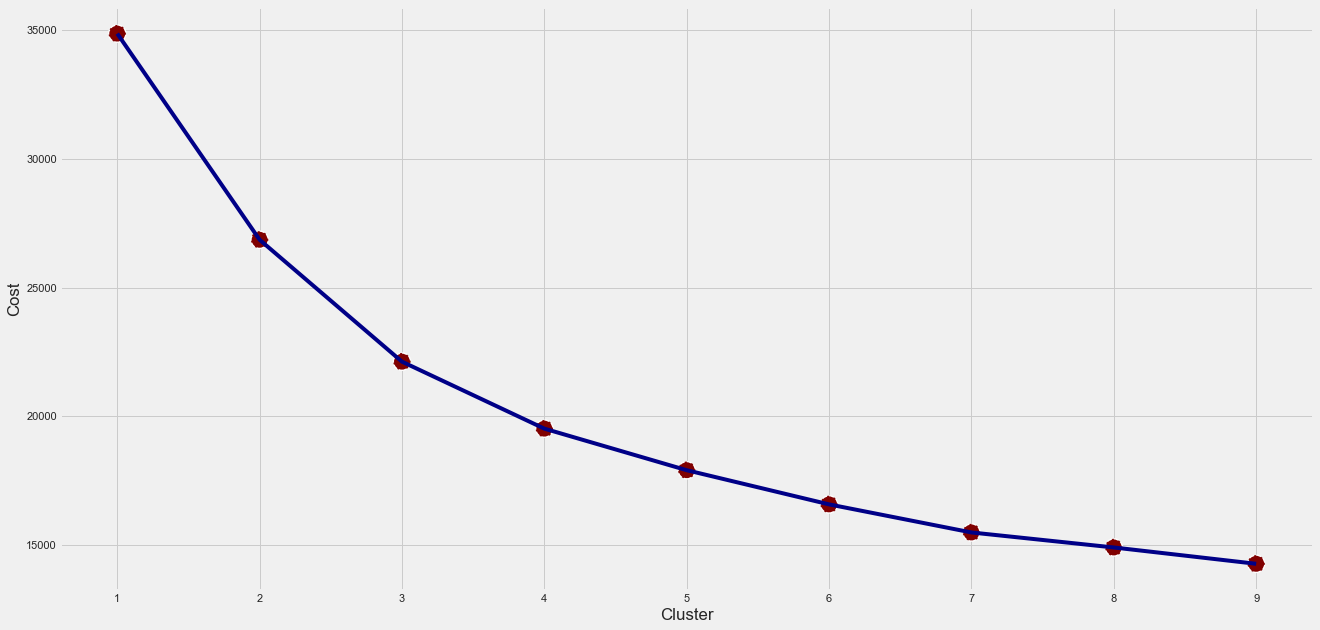

In [15]:
#Chart making
plt.figure(figsize=(20, 10))
sns.lineplot(data=df_cost, x='Cluster', y='Cost', color='#000087', linewidth = 4)
sns.scatterplot(data=df_cost, x='Cluster', y='Cost', s=300, color='#800000',  linestyle='--')
plt.show()

Membuat 4 segmentasi baru. Walau 5-7 ke atas masih cukup baik penurunannya namun semakin banyak segment maka dibutuhkan lebih banyak strategi bisnis.

In [11]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 4, init = 'Huang', random_state = 0)
kprototype.fit_predict(df_matrix, categorical = catColumnsPos)

array([3, 1, 0, ..., 2, 3, 1], dtype=uint16)

## PCA for Homogeneity Check

**Initial Processing**

*Spending Score processing* mengembalikannya ke data categorical ter one-hot

In [12]:
spending_onehot = pd.get_dummies(df01['Spending_Score'], columns='Spending_Score', prefix='Spending_Score')
spending_onehot.head(3)

,Spending_Score_1,Spending_Score_2,Spending_Score_3
0,1,0,0
1,0,1,0
2,1,0,0


In [13]:
df_pca = pd.concat([df01, spending_onehot], axis=1)
df_pca.drop(['Spending_Score', 'Segmentation'], axis=1, inplace=True)

df_pca.head(3)

,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,...,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Spending_Score_1,Spending_Score_2,Spending_Score_3
0,-1.569557,0.019322,0.876402,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,-0.163683,0.019322,0.286154,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,1.316412,0.019322,-1.547326,1,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0


### Previous Segmentation

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(df_pca)
pcs = pca.transform(df_pca)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])

data_pca['Segmentation'] = prev_segment

data_pca.head()

,PC 1,PC 2,Segmentation
0,2.384029,0.366135,D
1,-0.128401,0.349471,A
2,-1.825943,-0.977139,B
3,-1.922193,0.947410,B
4,0.226238,1.139114,A


In [15]:
data_pca['Segmentation'] = data_pca['Segmentation'].map({'A':0, 'B':1, 'C':2, 'D':3})

data_pca.head(3)

,PC 1,PC 2,Segmentation
0,2.384029,0.366135,3
1,-0.128401,0.349471,0
2,-1.825943,-0.977139,1


In [16]:
sample_pca = data_pca.sample(frac=0.2, random_state=1)

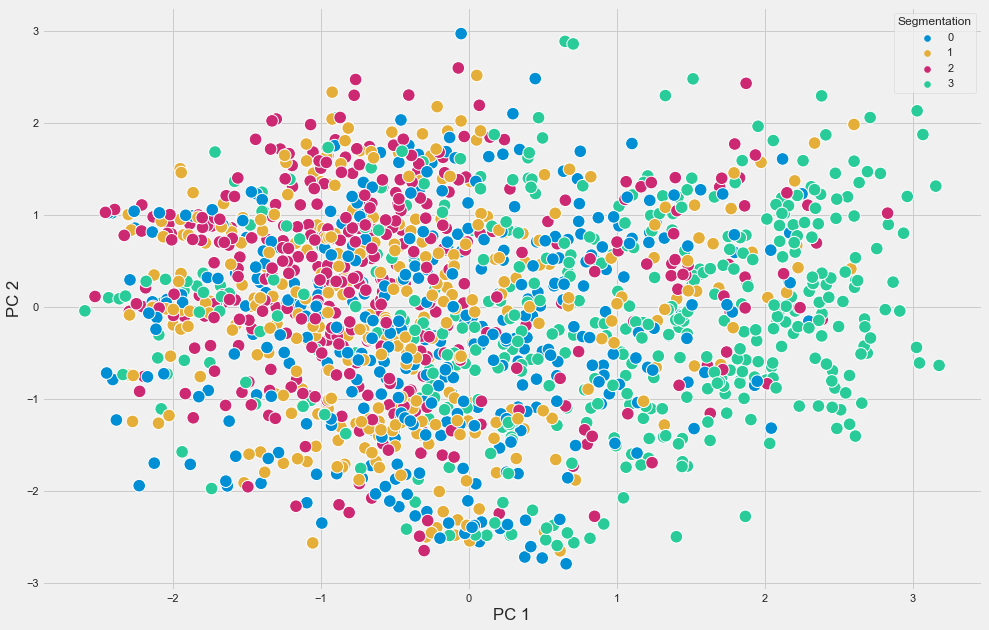

In [17]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="Segmentation",
    data=sample_pca,
    palette=['#008fd5','#e5ae38', '#cc2972', '#29cc98'], # 4 cluster
    s=160,
    ax=ax
)
plt.show()

Segmentasi yang sangat tidak homogen

### New Segmentation

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(df_pca)
pcs = pca.transform(df_pca)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])

data_pca['Segmentation'] = kprototype.labels_

data_pca.head()

,PC 1,PC 2,Segmentation
0,2.384029,0.366135,3
1,-0.128401,0.349471,1
2,-1.825943,-0.977139,0
3,-1.922193,0.947410,0
4,0.226238,1.139114,1


In [19]:
sample_pca = data_pca.sample(frac=0.2, random_state=1)

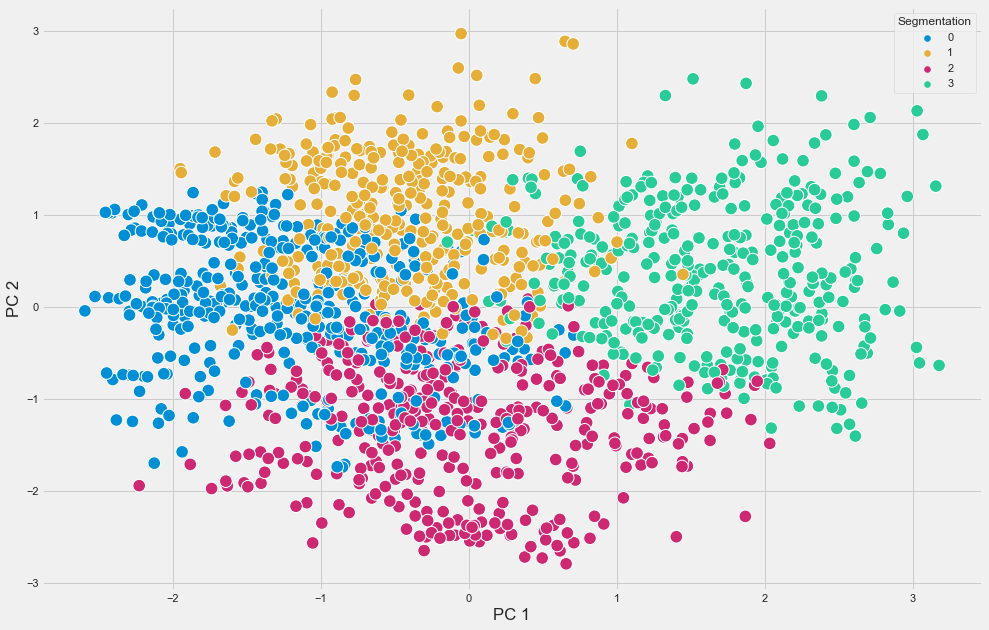

In [20]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="Segmentation",
    data=sample_pca,
    palette=['#008fd5','#e5ae38', '#cc2972', '#29cc98'], # 4 cluster
    s=160,
    ax=ax
)
plt.show()

Meski tidak sempurna, terlihat jauh lebih homogen.

## Segment Intrepretation

In [21]:
# Add the cluster to the dataframe
df02['Cluster Labels'] = kprototype.labels_
df02['Segment'] = df02['Cluster Labels'].map({0:'A', 1:'B', 2:'C',3:'D'})

df02.drop(['Cluster Labels', 'Segmentation'], axis=1, inplace=True)

df02['Segment'] = df02['Segment'].astype('category')

df02.head(3)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segment
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,B
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,A


In [22]:
# Cluster interpretation (explain centroid in cluster): 
# for numerical will be using median (for avoid skewness misslead)
# for categorical will using mode

df02['Total'] = 1

df02.groupby('Segment').agg(
    {
        'Total':'count',
        'Gender': lambda x: x.value_counts().index[0],
        'Ever_Married': lambda x: x.value_counts().index[0],
        'Age':'median',
        'Graduated': lambda x: x.value_counts().index[0],
        'Profession':lambda x: x.value_counts().index[0],
        'Work_Experience': 'median',
        'Spending_Score':lambda x: x.value_counts().index[0],
        'Family_Size': 'median',
        'Var_1': lambda x: x.value_counts().index[0]
    }
).reset_index()

,Segment,Total,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,A,2260,Male,Yes,55,Yes,Artist,0.0,Low,2.0,Cat_6
1,B,1829,Male,Yes,50,Yes,Artist,1.0,Average,4.0,Cat_6
2,C,1980,Female,Yes,38,Yes,Artist,8.0,Low,2.0,Cat_6
3,D,1999,Male,No,26,No,Healthcare,1.0,Low,4.0,Cat_6


In [23]:
import os

os.system('jupyter nbconvert --to html Part_5_Clustering_and_PCA.ipynb')

0